### Week 4: Decision Tree and Random Forest
###### Joel Konitzer
###### 9/18/2022

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# sklearn packages
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# plotting
import seaborn as sns

# custom functions
import EDAFunctions
import CARTFunctions

import warnings
warnings.filterwarnings("ignore")

##### Load German credit risk dataset be to compare and contrast model performance using Decision Tree and Random Forest supervised learning algorithms

In [42]:
df = pd.read_csv('german_credit_risk.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Checking.Account   1000 non-null   object
 1   Duration           1000 non-null   int64 
 2   Credit.Hist        1000 non-null   object
 3   Purpose            1000 non-null   object
 4   Credit.Amount      1000 non-null   int64 
 5   Saving.Account     1000 non-null   object
 6   Employmnet         1000 non-null   object
 7   Disposable.Income  1000 non-null   int64 
 8   Personal.Status    1000 non-null   object
 9   Other.Debtors      1000 non-null   object
 10  Present.Residence  1000 non-null   int64 
 11  Property           1000 non-null   object
 12  Age                1000 non-null   int64 
 13  Other.Loans        1000 non-null   object
 14  Housing            1000 non-null   object
 15  Existing.Credits   1000 non-null   int64 
 16  Job                1000 non-null   object
 

In [43]:
# Preview inital dataset row
df.head()

,Checking.Account,Duration,Credit.Hist,Purpose,Credit.Amount,Saving.Account,Employmnet,Disposable.Income,Personal.Status,Other.Debtors,...,Property,Age,Other.Loans,Housing,Existing.Credits,Job,Number.Liable,Telephone,Foreign.Worker,Cost.Matrix
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


##### The dataset contains categorical columns that will need to be transformed to numeric types

In [44]:
from sklearn.preprocessing import LabelEncoder
#Transforming dataframe using sklearn preprocessing. Storing categorical labels in 'encoder' and separating both Categorical and Numeric columns for later use
df, encoder, colsCat, colsNum = CARTFunctions.transform_categoricals(df)
df.head()

,Checking.Account,Duration,Credit.Hist,Purpose,Credit.Amount,Saving.Account,Employmnet,Disposable.Income,Personal.Status,Other.Debtors,...,Property,Age,Other.Loans,Housing,Existing.Credits,Job,Number.Liable,Telephone,Foreign.Worker,Cost.Matrix
0,0,6,4,4,1169,4,4,4,2,0,...,0,67,2,1,2,2,1,1,0,1
1,1,48,2,4,5951,0,2,2,1,0,...,0,22,2,1,1,2,1,0,0,2
2,3,12,4,7,2096,0,3,2,2,0,...,0,49,2,1,1,1,2,0,0,1
3,0,42,2,3,7882,0,3,2,2,2,...,1,45,2,2,1,2,2,0,0,1
4,0,24,3,0,4870,0,2,3,2,0,...,3,53,2,2,2,2,2,0,0,2


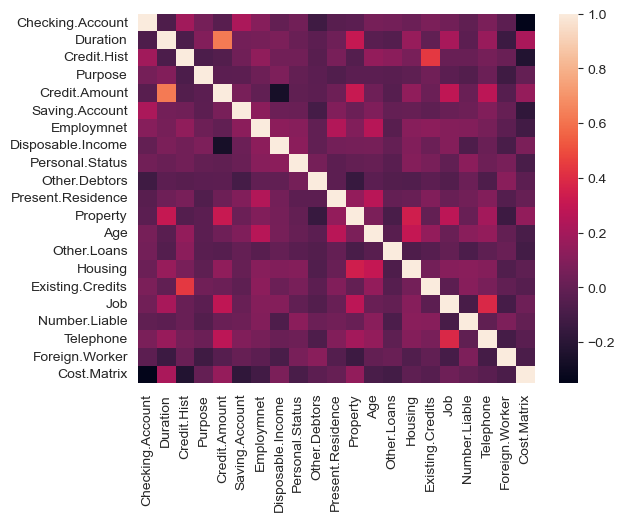

In [20]:
#View correlations
_ = sns.heatmap(df.corr())

### Decision tree classifier 
##### The decision tree classifer will be performed first since it is the more basic of the two

In [61]:
#gather up names of all the columns
cols = df.columns

prediction_col = 'Cost.Matrix'
feature_cols = [c for c in cols if c != prediction_col]

X = df[feature_cols].values
y = df[prediction_col].values

#split the dataset into the train and test data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [62]:
#establish and fit the model using DecisonTree()
from sklearn import tree

tree_model = tree.DecisionTreeClassifier()
tree_model.fit(x_train, y_train)

#gathering the predictions
preds = tree_model.predict(x_test)

In [23]:
#display the actuals and predictions for the test set
print('Actuals for test data set')
print(y_test)
print('Predictions for test data set')
print(preds)

Actuals for test data set
[1 2 1 1 1 2 1 2 1 2 1 1 1 1 1 1 1 1 1 2 1 2 1 2 2 1 1 2 2 1 1 1 1 2 1 2 1
 1 1 1 2 1 1 2 1 2 1 1 2 1 2 1 1 2 2 2 1 1 1 2 1 1 1 2 1 1 1 2 1 2 2 1 2 1
 1 1 2 1 2 2 1 1 1 2 2 1 2 1 1 1 1 1 1 2 1 1 1 1 2 1 2 1 1 1 2 1 1 1 1 2 1
 1 1 1 1 1 2 2 1 1 2 1 1 2 2 1 1 2 1 1 2 2 1 1 1 1 1 1 1 1 2 2 2 1 2 1 2 1
 2 2 1 2 1 2 1 1 1 2 2 2 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 2 1 1 2
 1 1 2 1 2 2 1 1 1 1 2 2 1 2 1]
Predictions for test data set
[1 2 1 1 1 2 1 2 1 1 1 2 1 1 2 1 2 1 1 1 1 2 1 2 1 2 1 2 2 1 1 2 1 2 1 2 2
 1 2 2 1 2 1 2 1 2 2 1 1 1 2 1 1 2 2 1 1 2 1 1 1 2 1 2 1 2 1 1 1 1 2 1 1 1
 1 1 1 1 2 1 1 1 2 2 2 1 2 1 2 1 1 2 1 1 1 1 1 1 2 1 2 2 2 1 1 2 1 1 2 2 1
 1 1 1 2 1 1 1 1 2 2 2 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 2 1 1 2 1 2 1 1 2 1
 2 1 1 1 1 2 1 2 1 1 1 2 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 2 2 1 2 1
 1 1 1 2 2 1 2 2 1 1 2 2 1 1 2]


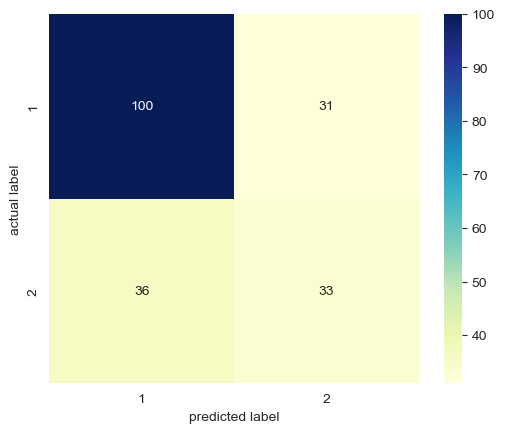

In [65]:
# make a confusion matrix to display the results
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, preds)
target_labels = np.unique(y_test)

sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True, cmap="YlGnBu",
            xticklabels=target_labels, yticklabels=target_labels)

plt.xlabel('predicted label')
plt.ylabel('actual label');

##### The confusion matrix above shows a realatively similar distribution for 3 of the 4 quandrants. 

In [66]:
# Get the model accuracy using sklearn.metrics package
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,preds))

0.665


In [67]:
# View feature importances
importance_list = list(zip(feature_cols,tree_model.feature_importances_))
sorted_import_feature = sorted(importance_list, key = lambda x: x[1],reverse=True)

max_feature_len = len(max(feature_cols, key=len))
for feature, rank in sorted_import_feature:
    dots = max_feature_len - len(feature)
    print(f'{feature}: {"."*dots} {rank*100:.2f}%')

Credit.Amount: .... 19.70%
Checking.Account: . 13.27%
Duration: ......... 10.36%
Age: .............. 9.12%
Disposable.Income:  5.62%
Employmnet: ....... 4.86%
Saving.Account: ... 4.78%
Purpose: .......... 4.62%
Credit.Hist: ...... 4.59%
Other.Debtors: .... 3.46%
Personal.Status: .. 3.39%
Property: ......... 3.07%
Other.Loans: ...... 3.04%
Present.Residence:  1.79%
Housing: .......... 1.68%
Telephone: ........ 1.65%
Existing.Credits: . 1.60%
Job: .............. 1.54%
Number.Liable: .... 1.38%
Foreign.Worker: ... 0.48%


#### Visualize decision tree

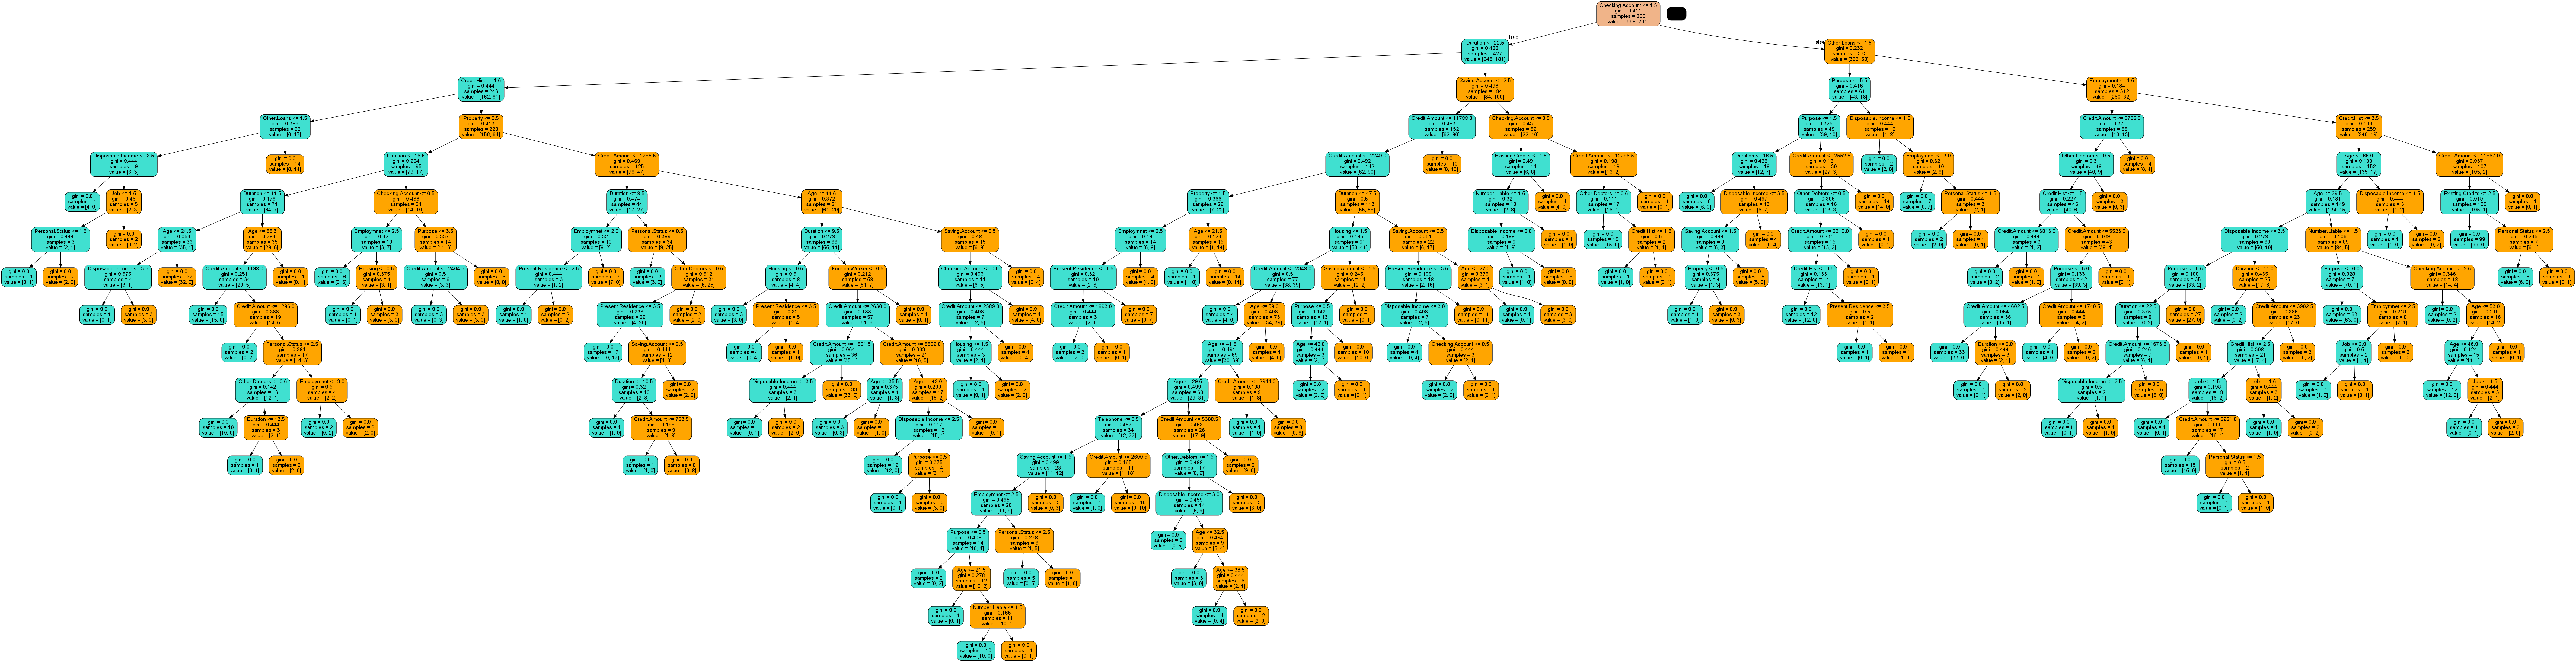

In [18]:
graphname = 'decisiontree_1'
CARTFunctions.CART_graphviz(tree_model, feature_cols, graphname)

from IPython.display import Image
Image(filename=f'{graphname}.png') 

### Random Forest Classifier
##### Using the same training as the decision tree classifier for the random forest classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier

forest_model = RandomForestClassifier(n_jobs = -1, random_state=41)
forest_model.fit(x_train,y_train)

#Get predictions
forest_preds = forest_model.predict(x_test)

In [30]:
# Display the actuals and predictions for the test set
print('Actuals for test data set')
print(y_test)
print('Predictions for test data set')
print(forest_preds)

Actuals for test data set
[1 2 1 1 1 2 1 2 1 2 1 1 1 1 1 1 1 1 1 2 1 2 1 2 2 1 1 2 2 1 1 1 1 2 1 2 1
 1 1 1 2 1 1 2 1 2 1 1 2 1 2 1 1 2 2 2 1 1 1 2 1 1 1 2 1 1 1 2 1 2 2 1 2 1
 1 1 2 1 2 2 1 1 1 2 2 1 2 1 1 1 1 1 1 2 1 1 1 1 2 1 2 1 1 1 2 1 1 1 1 2 1
 1 1 1 1 1 2 2 1 1 2 1 1 2 2 1 1 2 1 1 2 2 1 1 1 1 1 1 1 1 2 2 2 1 2 1 2 1
 2 2 1 2 1 2 1 1 1 2 2 2 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 2 1 1 2
 1 1 2 1 2 2 1 1 1 1 2 2 1 2 1]
Predictions for test data set
[1 2 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 2 1 1 2 1 1 1 2 1
 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 2 2 2 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1
 1 1 1 1 2 2 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 2 1
 1 1 1 1 1 2 1 2 1 2 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 2 2 1 2 1
 1 1 1 1 1 1 1 1 1 1 2 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2
 1 1 1 1 1 2 1 1 1 1 2 2 1 1 1]


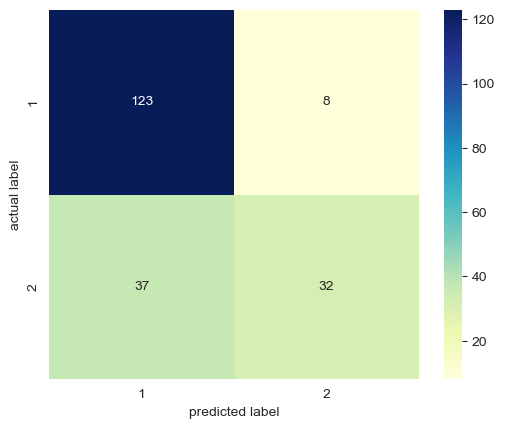

In [31]:
# make a confusion matrix to display the results
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, forest_preds)
target_labels = np.unique(y_test)

sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True, cmap="YlGnBu",
            xticklabels=target_labels, yticklabels=target_labels)

plt.xlabel('predicted label')
plt.ylabel('actual label');

In [32]:
# Get the model accuracy using sklearn.metrics package
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,forest_preds))

0.775


In [36]:
# View feature importances
importance_list = list(zip(feature_cols,tree_model.feature_importances_))
sorted_import_feature = sorted(importance_list, key = lambda x: x[1],reverse=True)

max_feature_len = len(max(feature_cols, key=len))
for feature, rank in sorted_import_feature:
    dots = max_feature_len - len(feature)
    print(f'{feature}: {"."*dots} {rank*100:.2f}%')

Credit.Amount: .... 16.96%
Checking.Account: . 13.65%
Duration: ......... 9.84%
Age: .............. 9.79%
Employmnet: ....... 6.08%
Saving.Account: ... 5.38%
Disposable.Income:  5.15%
Purpose: .......... 4.32%
Credit.Hist: ...... 4.18%
Other.Debtors: .... 3.68%
Personal.Status: .. 3.68%
Property: ......... 3.27%
Other.Loans: ...... 3.04%
Job: .............. 2.68%
Present.Residence:  2.55%
Housing: .......... 2.44%
Telephone: ........ 1.26%
Existing.Credits: . 1.19%
Foreign.Worker: ... 0.48%
Number.Liable: .... 0.38%


##### Select one tree from the random forest model to visualize

In [37]:
from sklearn.tree import export_graphviz
estimator= forest_model.estimators_[50] #extract one tree to test
features = df.columns[:-1]

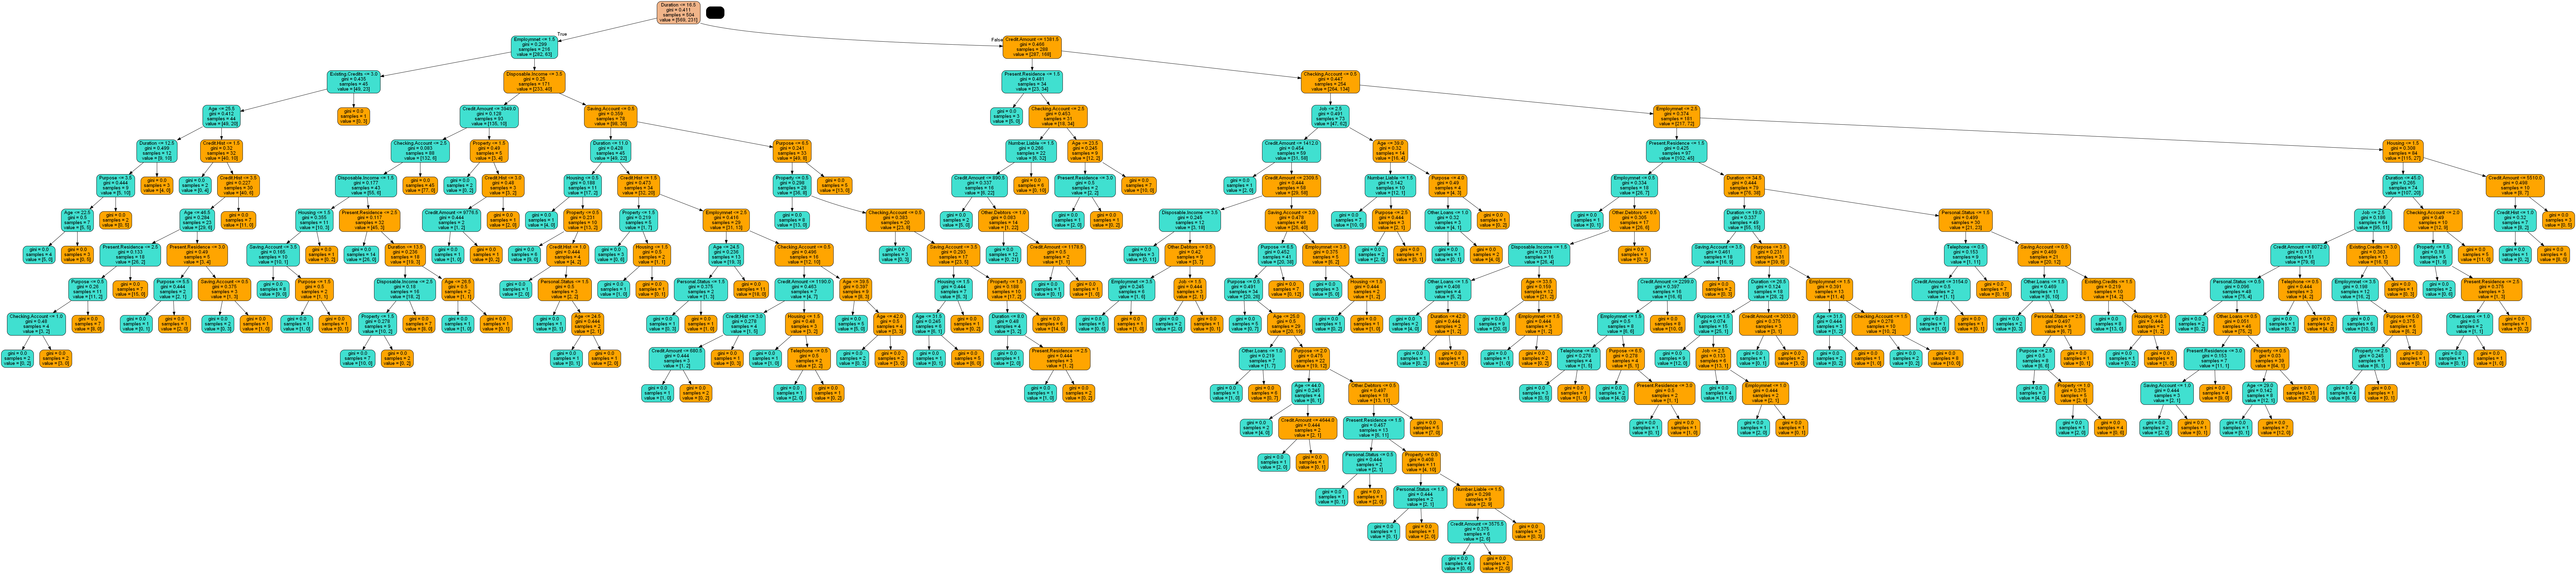

In [38]:
graphname = 'randomforest_1'
CARTFunctions.CART_graphviz(estimator, features, graphname)

from IPython.display import Image
Image(filename=f'{graphname}.png') 

##### This exercise utilized decision tree and random forest supervised learning algorithms on consumer credit history data to demonstrate rule generation and outcome prediction. The categorical features represent descriptive customer details, so they were transformed into numeric types before splitting the dataset into train and test sets. The initial EDA showed strong feature correlations with duration, checking account, and credit history.
##### The decision tree classifier was used first, and the confusion matrix showed a similar distribution between False (cost matrix of 2)  actual & predicted values, implying that only half were correctly predicted. The model accuracy of 0.66 helps confirm this. Like the decision tree classifier, the random forest classifier did not do well with predicting credit risk as it had similar results as before, predicting only half of the observations. As for the true actual and predicted values (cost matrix of 1), the random forest classified performed better by only incorrectly predicting 8 observations versus over 30 seen with the decision tree. The insights gained from this analysis can be followed up by investigating what features play more importance than others in determining credit risk. One item to note is that the correlation plot that was looked at initially showed credit history to be highly correlated with the cost matrix. However, after the dataset was trained, the feature importance sets credit history lower and employment and age higher in predictive power.  